# YouTube Scraper

## Kelloggs Group 

### 1. Getting Project Dependecies

run **pip install -r requirements.txt** in your terminal

This installs pandas, numpy and [pytchat](https://pypi.org/project/pytchat/)

In [ ]:
#!pip install -r requirements.txt

In [6]:
import pandas as pd
import pytchat
import matplotlib.pyplot as plt
import time

In [2]:
def get_yt_data(chat,run_time=10, show_chat=True):
    """
    Takes in a chat instance and runtime and returns
    a dataframe with all chat data in that time
    
    :param chat: pychat instance
    :param run_time: int with total runtime
    :param show_chat: boolean telling chat to print or not
    :return: pandas dataframe
    """
    start_time = time.time()
    send_time = []
    name = []
    message = []
    while chat.is_alive():
        for c in chat.get().sync_items():
            send_time.append(c.datetime)
            name.append(c.author.name)
            message.append(c.message)
            
            if show_chat:
                print(f"{c.datetime} [{c.author.name}]- {c.message}")

            if time.time() - start_time >= run_time:
                return pd.DataFrame({'time':send_time,'name':name,'message':message})
    

### 2. Scraping your YouTube data

- Copy the live YouTube link

- Make it a string and set it equal to the **yt_link** variable

- Run cell and get data

In [4]:
yt_link = "https://www.youtube.com/watch?v=LodADaKUWp8"
chat = pytchat.create(video_id=yt_link)
chat_data = get_yt_data(chat,60,False)
chat_data.head()

,time,name,message
0,2022-02-18 15:35:45,Taco Slayer,SMOKED BBQ NACHOS!!!!!!!!!
1,2022-02-18 15:35:45,Fritz Link,its not bbq
2,2022-02-18 15:35:46,Gustavo Gaming channel,Salmon
3,2022-02-18 15:35:45,Drillz,there's smoked coochie
4,2022-02-18 15:35:46,derek,catfish


### 3. How can this be used?
- This could be used to scrape data from youtube channels that talk over relevant topics to see what this are being said the most in reference to a project.

- Seeing what users are most active

- Seeing what times are most active

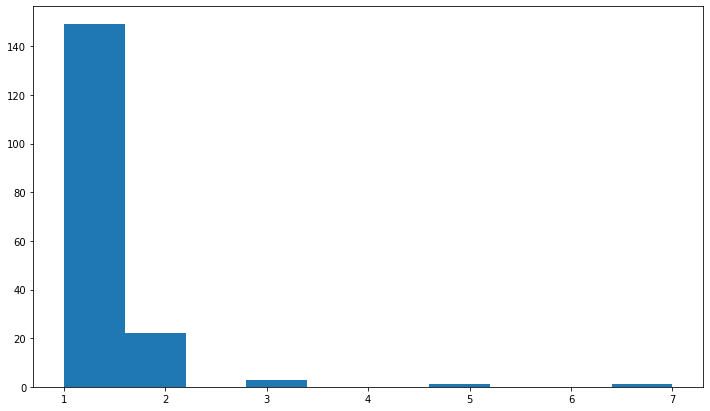

In [18]:
plt.figure(figsize = (12,7))
plt.hist(chat_data['name'].value_counts());

### 4. References to libraries used

- [pytchat](https://pypi.org/project/pytchat/)

- [pandas](https://pandas.pydata.org/)

- [matplotlib](https://matplotlib.org/)